### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# Installing Necessary Libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install statsmodels
!pip install missingno

# Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572323,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572324,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572325,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572326,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0


## Reading Dataset

In [ ]:
df=pd.read_csv("weather.csv")
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


## Removing Last Null column from dataset

In [ ]:
df=df.iloc[:,:-1]
df

## Selecting only columns that are highly correlated with target

In [55]:
df=df[['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE','M_TIME_OFFSET','M_WEATHER_FORECAST_SAMPLES_M_WEATHER','M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE','M_TRACK_TEMPERATURE_CHANGE','M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE','M_AIR_TEMPERATURE_CHANGE','M_RAIN_PERCENTAGE']]
df.dropna(how='all',inplace=True)
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3572323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Distrubution of Data

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

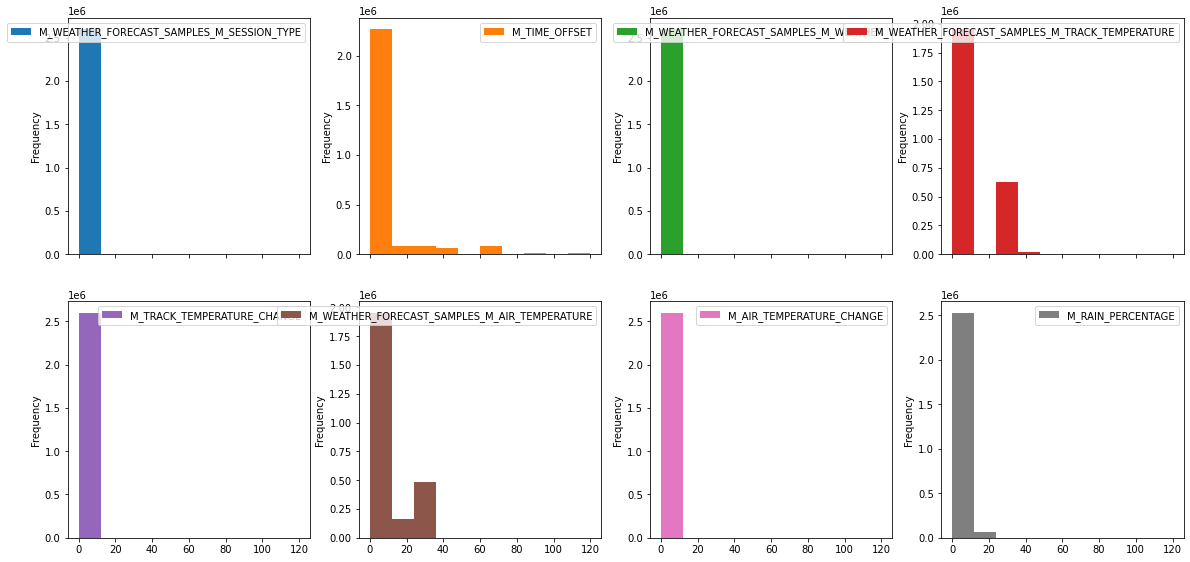

In [46]:
df.plot.hist(subplots=True, layout=(4,4), figsize=(20, 20))

## Checking Correlation 

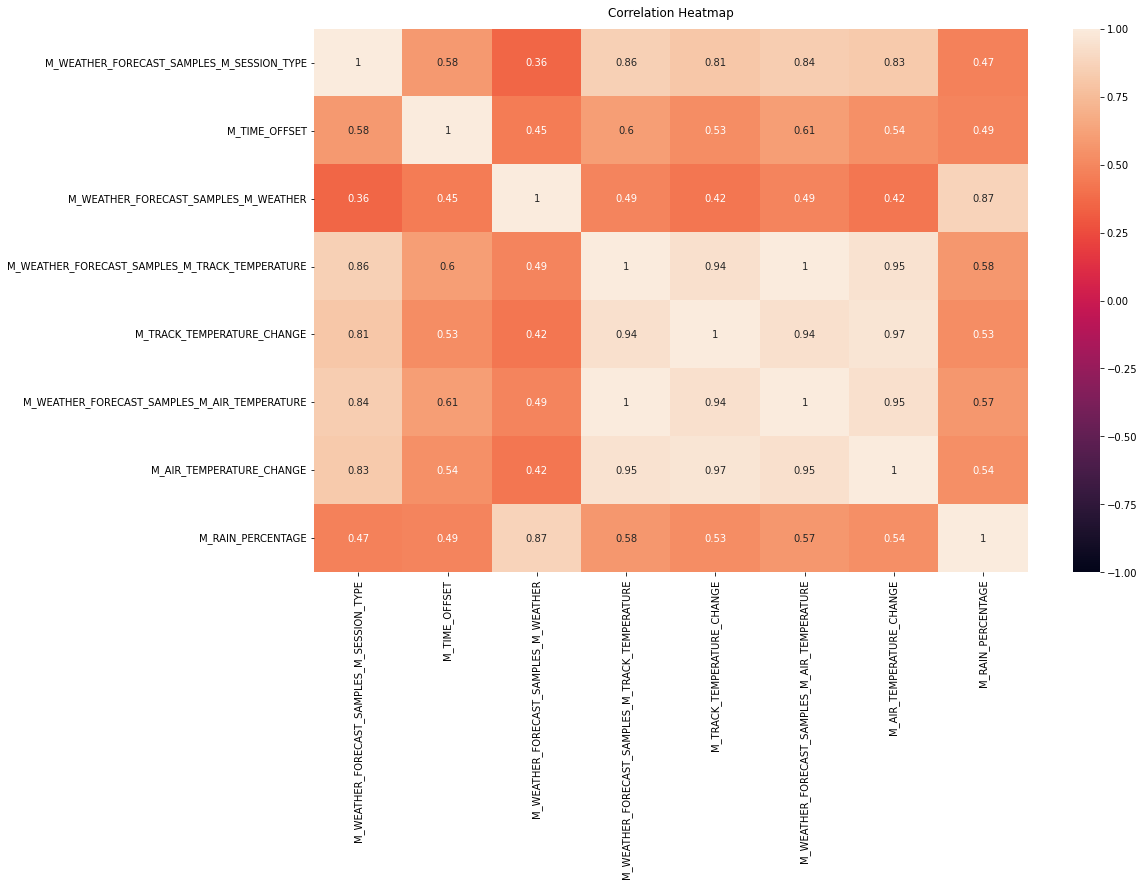

In [48]:
plt.figure(figsize=(16,10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Checking For Null Values in Data

<AxesSubplot:>

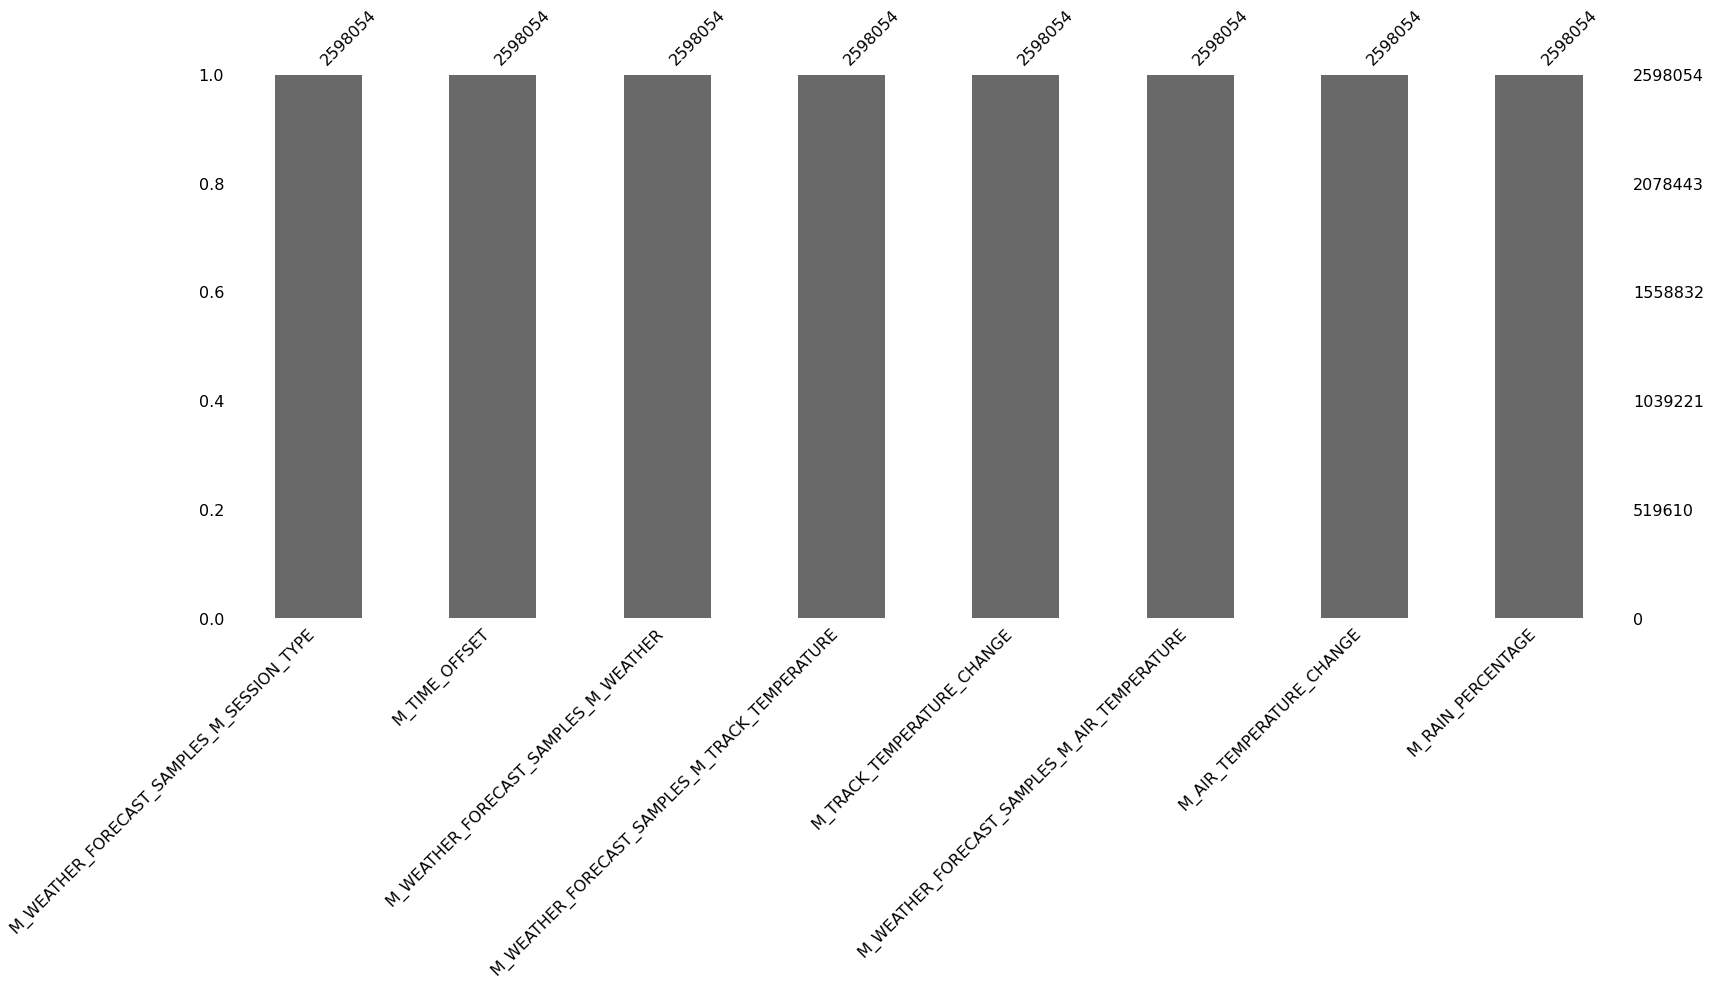

In [21]:
msno.bar(df)

<AxesSubplot:>

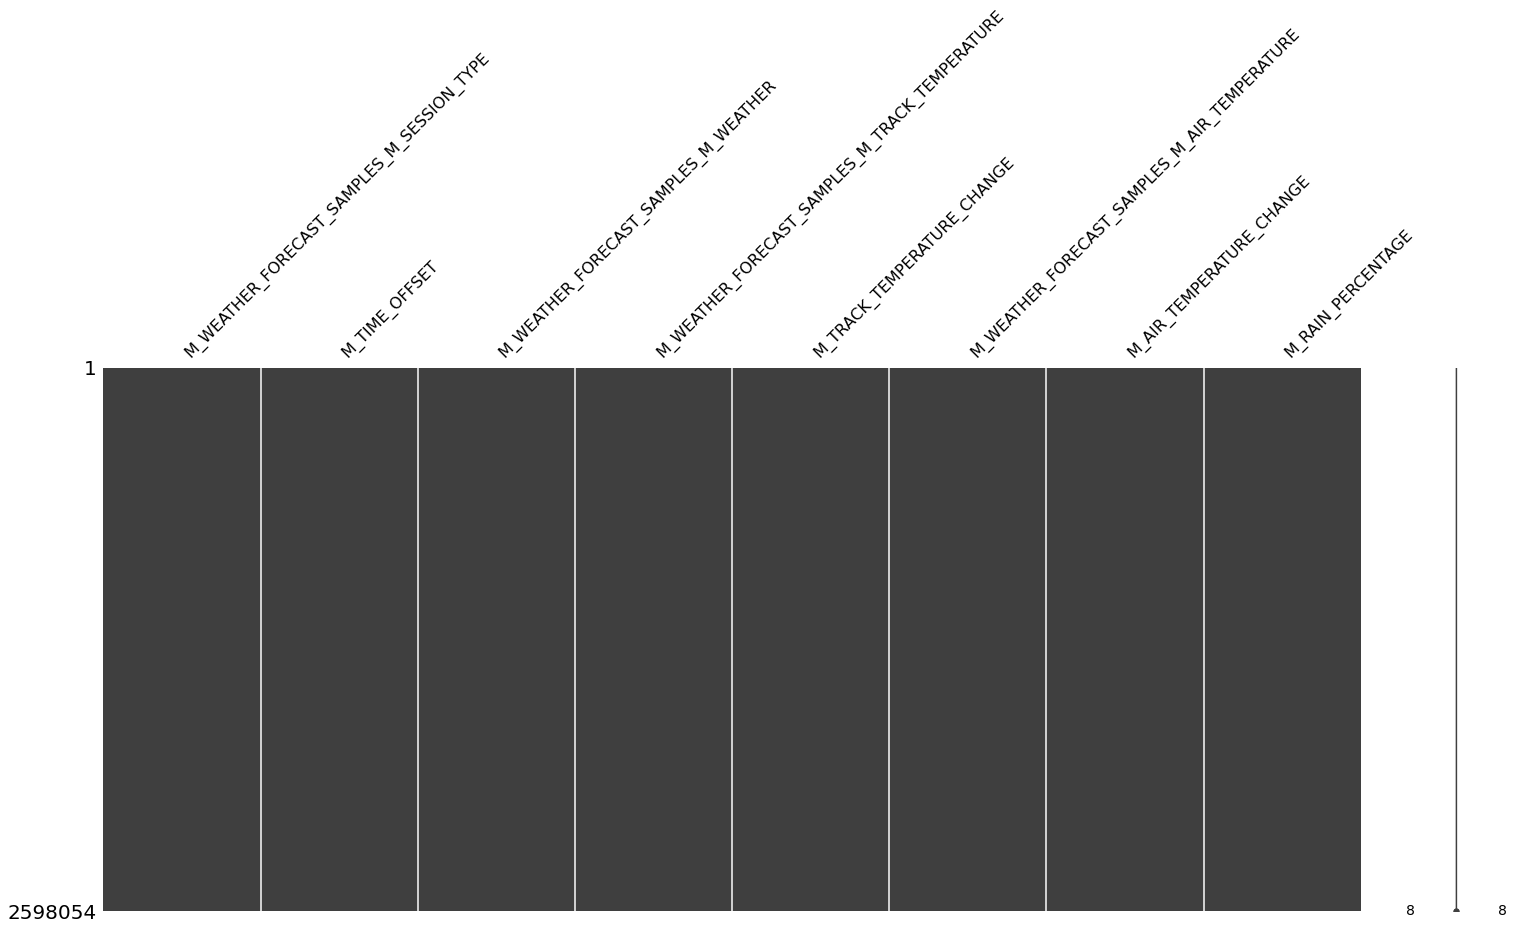

In [23]:
msno.matrix(df)

## Normalization

In [49]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [50]:
df

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2598049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperating feature columns from data for Weather Type

In [60]:
X_Weather=df[df.columns[df.columns!='M_WEATHER_FORECAST_SAMPLES_M_WEATHER']]
X_Weather.head()


,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperating feature columns from data for Rain Percentage

In [56]:
X=df[df.columns[df.columns!='M_RAIN_PERCENTAGE']]
X.head()



,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seperating Weather Type column from data

In [61]:
Y_Weather=df['M_WEATHER_FORECAST_SAMPLES_M_WEATHER']
Y_Weather.head()

21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
Name: M_WEATHER_FORECAST_SAMPLES_M_WEATHER, dtype: float64

## Seperating Rian Percentage column from data

In [57]:
Y=df['M_RAIN_PERCENTAGE']
Y.head()

21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
Name: M_RAIN_PERCENTAGE, dtype: float64

# Splitting into Test and Train For Weather Type

In [62]:
from sklearn.model_selection import train_test_split
train_x_Weather, test_x_Weather, train_y_Weather,test_y_Weather=train_test_split(X_Weather,Y_Weather,random_state=1,test_size=0.2)

print('train_x_Weather shape:\n', train_x_Weather.shape)
print('train_y_Weather shape:\n', train_y_Weather.shape, '\n')
print('test_x_Weather shape:\n', test_x_Weather.shape)
print('test_y_Weather shape:\n', test_y_Weather.shape,  '\n')


train_x_Weather shape:
 (2078443, 7)
train_y_Weather shape:
 (2078443,) 

test_x_Weather shape:
 (519611, 7)
test_y_Weather shape:
 (519611,) 



# Splitting into Test and Train For Rain Percentage

In [58]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=1,test_size=0.2)

print('train_x shape:\n', train_x.shape)
print('train_y shape:\n', train_y.shape, '\n')
print('test_x shape:\n', test_x.shape)
print('test_y shape:\n', test_y.shape,  '\n')


train_x shape:
 (2078443, 7)
train_y shape:
 (2078443,) 

test_x shape:
 (519611, 7)
test_y shape:
 (519611,) 



## Using Decision Tree Classifier for Weather type

In [63]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x,train_y.ravel())
DT_a = clf.score(test_x,test_y)*100
DT_acc = np.around(DT_a,2)
print("Accuracy of Decision Trees Regressor: ",DT_acc,"%")

Accuracy of Decision Trees Regressor:  97.34 %


## Confusion Matrix for weather type

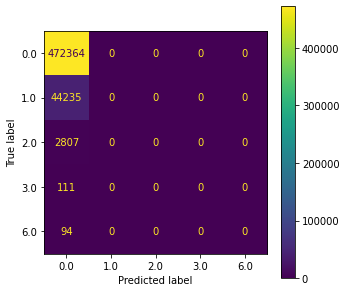

In [82]:
plt.rcParams["figure.figsize"]=(5,5)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_x_Weather, test_y_Weather)
plt.show()

## Using Decision Tree Regressor for Rain Prediction

In [65]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg = reg.fit(train_x,train_y.ravel())
DT_a = reg.score(test_x,test_y)*100
DT_acc = np.around(DT_a,2)
print("Accuracy of Decision Trees Regressor: ",DT_acc,"%")

Accuracy of Decision Trees Regressor:  98.88 %


In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, )

ValueError: y_true and y_pred have different number of output (1!=7)

## Model Validation for classification of Weather Types

In [80]:
from sklearn import model_selection
from sklearn.metrics import classification_report
predicted = clf.predict(test_x)
report = classification_report(test_y, predicted)
print(report)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    390127
         1.0       0.95      0.89      0.92     39264
         2.0       0.94      0.82      0.87     15428
         3.0       0.69      0.93      0.79     18953
         4.0       0.94      0.82      0.88     14133
         5.0       0.96      0.95      0.96      4662
         6.0       1.00      0.99      0.99     10295
         7.0       0.97      0.96      0.97      3377
         8.0       0.90      0.84      0.87      2038
         9.0       1.00      0.94      0.97      1937
        10.0       0.98      0.77      0.86      2537
        11.0       0.91      0.96      0.94      2813
        12.0       0.85      0.84      0.84      1600
        13.0       0.88      0.90      0.89      2480
        14.0       0.93      0.97      0.95      6689
        15.0       0.74      0.86      0.79       701
        16.0       0.67      0.93      0.78       388
        17.0       1.00    

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
